# Guido subset_ main thesis project -ReHo

In [1]:
import pandas as pd
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, ConcatDataset, TensorDataset
from torchvision import transforms
from sklearn.model_selection import KFold
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## start of classsification using Reho

In [2]:
control_base_path = '/dbstore/zmohaghegh/UKBiobank_subset/summary_measures_2020/ReHo_Control/ReHo_Normalised_z/'
mdd_base_path = '/dbstore/zmohaghegh/UKBiobank_subset/summary_measures_2020/MDD_Reho/ReHo_Normalised_z/'

#define data path for control and MDD seprately

control_files_path = [control_base_path + f for f in os.listdir(control_base_path) if f.startswith('ReHo')]
mdd_files_path = [mdd_base_path + f for f in os.listdir(mdd_base_path) if f.startswith('ReHo')]
print(len(control_files_path), len(mdd_files_path))

406 401


### load data with nan 

In [3]:
#loading data seprately and set a label column for Control=0 and MDD=1

control_dataset_reho_zero = [[nib.load(c).get_fdata(),0] for c in control_files_path]
mdd_dataset_reho_zero = [[nib.load(m).get_fdata(),1] for m in mdd_files_path]

##### define numpy array for doing the zero nan

In [4]:
control_reho_zero_nan2= control_dataset_reho_zero
mdd_reho_zero_nan2 = mdd_dataset_reho_zero

print(mdd_reho_zero_nan2[0][0].shape)
print(len(mdd_reho_zero_nan2))
print(mdd_reho_zero_nan2[0][1])

mdd_reho_zero_nan3 = np.array(mdd_reho_zero_nan2)
control_reho_zero_nan3 =np.array(control_reho_zero_nan2)
print(control_reho_zero_nan2[0][0].shape)
print(len(control_reho_zero_nan2))

control_reho_zero_nan3[0][1]

(91, 109, 91)
401
1
(91, 109, 91)
406


/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


0

In [5]:
len(mdd_dataset_reho_zero)

401

In [6]:
len(control_dataset_reho_zero)

406

In [7]:
len(mdd_dataset_reho_zero[0])
len(control_dataset_reho_zero[0])

2

In [8]:
mdd_dataset_reho_zero[0][0].shape
control_dataset_reho_zero[0][0].shape

(91, 109, 91)

In [9]:
control_dataset_reho_zero[400][0][:,34,56]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  1.68043089,  1.56969142,  1.86985874,  1.86096191,
        1.93146718,  2.11725903,  2.55462217,  1.91065693,  0.50844282,
        0.05930695,  0.66814291,  1.64210677,  1.08213818,  0.25858074,
       -0.56684363, -0.7189495 , -1.00350475, -1.3447212 , -1.21441877,
       -1.15065515, -1.24084473, -0.9478718 , -0.31155097, -0.26281989,
       -0.07350048,  0.28912649,  0.87050122,  1.24497306,  1.28742945,
        1.01400137,  1.10193563,  1.00789368,  0.5122267 , -0.2069111 ,
       -0.59625113, -0.91880149, -1.0220412 , -0.95108175, -0.74096751,
       -0.69755989, -1.0146656 , -0.39677244, -0.46503615, -0.83524621,
       -0.38343135, -0.36499518, -0.55830753, -0.06751805,  1.04009187,
        1.75702274,  1.7453953 ,  0.46958524, -0.02432077,  0.23

In [10]:
mdd_dataset_reho_zero[200][0][:,34,56]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  1.79748166,  2.23244691,  2.46228266,  2.37676692,
        2.67950821,  2.8220706 ,  2.97384691,  2.47968459,  1.04447949,
        0.56868804,  0.62520432,  1.05440676,  1.60742342,  1.8340683 ,
        1.42638516,  0.63835311,  0.064312  , -0.15793628, -0.19672982,
       -0.30844241, -0.67446357, -0.93465775, -0.32266736,  0.79667002,
        2.15235949,  2.49152207,  2.13894486,  1.57521474,  1.40513873,
        1.20334697,  2.04586911,  2.34183478,  2.3888669 ,  1.93715811,
        1.14480829,  0.53450775, -0.11468144, -0.90341431, -1.31888795,
       -0.82898754, -0.40580711, -0.09777391, -0.034695  , -0.10849591,
        0.70127684,  1.35595429,  0.89943755,  0.23620752, -0.77099097,
       -0.67806715,  0.20867163,  1.50419176,  1.35776031,  1.09

In [11]:
#example control
zero_nan_control_800= np.nan_to_num(control_dataset_reho_zero[400][0],copy=True)
zero_nan_control_800[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.68043089,  1.56969142,  1.86985874,  1.86096191,
        1.93146718,  2.11725903,  2.55462217,  1.91065693,  0.50844282,
        0.05930695,  0.66814291,  1.64210677,  1.08213818,  0.25858074,
       -0.56684363, -0.7189495 , -1.00350475, -1.3447212 , -1.21441877,
       -1.15065515, -1.24084473, -0.9478718 , -0.31155097, -0.26281989,
       -0.07350048,  0.28912649,  0.87050122,  1.24497306,  1.28742945,
        1.01400137,  1.10193563,  1.00789368,  0.5122267 , -0.2069111 ,
       -0.59625113, -0.91880149, -1.0220412 , -0.95108175, -0.74096751,
       -0.69755989, -1.0146656 , -0.39677244, -0.46503615, -0.83524621,
       -0.38343135, -0.36499518, -0.55830753, -0.06751805,  1.04009187,
        1.75702274,  1.7453953 ,  0.46958524, -0.02432077,  0.23

In [12]:
#example mdd
zero_nan_mdd_700= np.nan_to_num(mdd_dataset_reho_zero[200][0],copy=True)
zero_nan_mdd_700[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.79748166,  2.23244691,  2.46228266,  2.37676692,
        2.67950821,  2.8220706 ,  2.97384691,  2.47968459,  1.04447949,
        0.56868804,  0.62520432,  1.05440676,  1.60742342,  1.8340683 ,
        1.42638516,  0.63835311,  0.064312  , -0.15793628, -0.19672982,
       -0.30844241, -0.67446357, -0.93465775, -0.32266736,  0.79667002,
        2.15235949,  2.49152207,  2.13894486,  1.57521474,  1.40513873,
        1.20334697,  2.04586911,  2.34183478,  2.3888669 ,  1.93715811,
        1.14480829,  0.53450775, -0.11468144, -0.90341431, -1.31888795,
       -0.82898754, -0.40580711, -0.09777391, -0.034695  , -0.10849591,
        0.70127684,  1.35595429,  0.89943755,  0.23620752, -0.77099097,
       -0.67806715,  0.20867163,  1.50419176,  1.35776031,  1.09

In [13]:
#zero_nan_control
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1])
print(control_reho_zero_nan3[100][1])
print(control_reho_zero_nan3[0].shape)
print(type(control_reho_zero_nan3))


for i in range(len(control_dataset_reho_zero)):    
    control_reho_zero_nan3[i][0] =np.nan_to_num(control_dataset_reho_zero[i][0],copy=True)
    control_reho_zero_nan3[i][1] =np.nan_to_num(control_dataset_reho_zero[i][1],copy=True)

(406, 2)
(91, 109, 91)
0
0
(2,)
<class 'numpy.ndarray'>


In [14]:
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1]) ## mdd label for control=0
print(control_reho_zero_nan3[310][1])
control_reho_zero_nan3[310][0][:,34,56]


(406, 2)
(91, 109, 91)
0
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.92880917,  1.65505862,  1.50674844,  2.09607053,
        2.05625844,  2.41848874,  2.81477833,  2.72659802,  0.56506944,
       -0.57554001, -0.57232052,  0.4258582 ,  1.86898804,  2.42637134,
        0.73444235, -1.2418406 , -1.55629468, -0.67085862, -0.38477191,
       -0.59492254, -0.74451315, -1.08082223, -1.03288448, -0.70927638,
       -0.61947405, -0.0504877 ,  1.20987523,  1.3354032 ,  1.1982826 ,
        0.79785603,  1.10096228, -0.05129792, -0.35614774, -0.5955022 ,
        0.29684177,  0.87079233,  0.94436699, -0.40263551, -0.84259462,
       -0.74756503, -0.91505301, -0.75655597, -1.34471273, -1.12159681,
       -0.88892096, -0.87314522, -0.3770186 ,  0.09685825,  0.41978529,
        1.64266217,  1.3973223 ,  1.64998627,  1.87235522,  1.99

In [15]:
#zero_nan_mdd

print(mdd_reho_zero_nan3.shape)
print(mdd_reho_zero_nan3[0][0].shape)
print(type(mdd_reho_zero_nan3))

for i in range(len(mdd_dataset_reho_zero)):    
    mdd_reho_zero_nan3[i][0] =np.nan_to_num(mdd_dataset_reho_zero[i][0],copy=True)
    mdd_reho_zero_nan3[i][1] =np.nan_to_num(mdd_dataset_reho_zero[i][1],copy=True)

mdd_reho_zero_nan3.shape

(401, 2)
(91, 109, 91)
<class 'numpy.ndarray'>


(401, 2)

In [16]:
print(mdd_reho_zero_nan3.shape)

mdd_reho_zero_nan3.shape
print(mdd_reho_zero_nan3[0][0].shape)
print(mdd_reho_zero_nan3[0].shape)
print(mdd_reho_zero_nan3[0][1])
mdd_reho_zero_nan3[210][0][:,34,56]

(401, 2)
(91, 109, 91)
(2,)
1


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.89694434,  1.53167081,  1.40648949,  0.90064555,
        0.50201535,  1.05856395,  1.67457688,  0.33942047, -0.31369969,
       -0.86556798, -0.37977558,  0.27634034,  0.99926221,  0.79770249,
       -0.22853535, -0.82520247, -0.65290391, -0.62675053,  0.0279612 ,
        0.10059064, -1.12045527, -1.14470899, -0.3832809 , -0.16794838,
        0.68927377,  1.24274755,  0.80247015,  1.30472624,  1.91071725,
        2.41066408,  2.15777278,  2.05791116,  1.47320616,  0.74505085,
       -0.22453272, -0.89213282, -1.32719958, -1.27261472, -1.20149791,
       -1.18277717, -0.85600626, -0.2043324 ,  0.1393735 ,  0.37202767,
       -0.18662888, -0.3457886 , -0.0859847 , -0.29503322, -0.49483332,
       -0.72829646, -0.56183022, -0.27383313,  0.34166506,  1.35

### load and add 1 channel to dimension of data 'without nan'

In [17]:
# np.reshape(control_dataset[0][0], (1, 91, 109, 91))

control_reho_4d_zero_nan = [[np.reshape(c[0], (1, 91, 109, 91)), c[1]] for c in control_reho_zero_nan3]
mdd_reho_4d_zero_nan = [[np.reshape(m[0], (1, 91, 109, 91)), m[1]] for m in mdd_reho_zero_nan3]

In [18]:
print(mdd_reho_4d_zero_nan[200][0].shape)
mdd_reho_4d_zero_nan[200][1]

(1, 91, 109, 91)


1

In [19]:
print(control_reho_4d_zero_nan[400][0].shape)
control_reho_4d_zero_nan[400][1]

(1, 91, 109, 91)


0

In [20]:
len(mdd_reho_4d_zero_nan)

401

In [21]:
len(mdd_reho_4d_zero_nan[0])

2

### concat data for control and MDD without nan

In [22]:
dataset_ukbb_reho_zero_nan= ConcatDataset([control_reho_4d_zero_nan, mdd_reho_4d_zero_nan])

print(dataset_ukbb_reho_zero_nan[0][0].shape)
print(dataset_ukbb_reho_zero_nan[500][1])
print(dataset_ukbb_reho_zero_nan[310][1])


dataset_ukbb_reho_zero_nan[500][0][0,:,54,45]

#subject number=1500, mdd label,reho value for voxels along axial with y ,z dimention = 54,45

(1, 91, 109, 91)
1
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.7354008 ,  0.97225487,  0.6655516 ,  0.5045414 ,
        0.23751946,  0.39128035,  0.04286977, -0.19165701, -0.04427373,
        0.3572045 , -0.29436272, -0.98918092, -1.48211277, -0.93318349,
        0.07038743,  0.27300313, -0.31109539, -0.86865693, -0.24555571,
        0.11219197, -0.10363912, -1.05470514, -1.54315436, -1.04447842,
       -0.05038481,  0.2438602 ,  0.2133141 ,  0.15438046,  0.02535832,
       -0.20282435, -0.51745832, -0.33087346, -0.18913874, -0.82077676,
       -0.89444751, -0.80883682, -0.77305537, -1.18561471, -1.12578225,
       -1.00993824, -0.75254011, -0.35766476, -0.07388546, -0.44285613,
       -0.57027304, -0.82279837, -0.74773669, -0.94457603, -0.80450368,
       -0.97555399, -1.16351736, -0.53341681,  0.19823286, -0.00336363,
       -1.02229309, -1.242064  , -0.98520249, -0.14166881, -0.43

In [23]:
len(dataset_ukbb_reho_zero_nan)

807

In [24]:
len(dataset_ukbb_reho_zero_nan[0])

2

In [25]:
print(dataset_ukbb_reho_zero_nan[200][1]) # subject 800 label MDD =0
print(dataset_ukbb_reho_zero_nan[500][1]) # subject 1500 label MDD =1 

#problem solved : mdd_zero_nan label have problem : instead of 1 integer we have an array (91,109,91)

print(dataset_ukbb_reho_zero_nan[0][1])

dataset_ukbb_reho_zero_nan[500][1].shape

0
1
0


()

In [26]:
dataset_ukbb_reho_zero_nan[500][1]

1

### Network architecture

In [27]:
#Define a Convolutional Neural Network : BASED ON https://www.biorxiv.org/content/10.1101/2019.12.17.879346v1

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.downsample = nn.AvgPool3d(2, stride=2, padding=0)
        
        self.CNNlayer = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=3, stride=1),
            nn.ELU(),
            nn.Conv3d(64, 16, kernel_size=3, stride=1),
            nn.ELU(),
            nn.MaxPool3d(2)
        )
        
        self.flat1 = nn.Linear(160000, 16)   
        self.flat2 = nn.Linear(16, 1)
            
    def forward(self, x):
        x=self.downsample(x)
        #print(f'avg-pool: {x.size()}\n----------')
        #print(f'number of nan in this layer = {torch.isnan(x).sum()}')
        
        x=self.CNNlayer(x)
        #print(f'convolution1+2+maxpool: {x.size()} \n----------')
        
        x=x.reshape(x.size(0), -1)
        #print(f'reshape after cnn: {x.size()}\n----------')
        
        x=F.elu(self.flat1(x))
        #print(f'fully-connected1: {x.size()}\n----------')
                    
        x=self.flat2(x)
        #print(f'fully-connected2: {x.size()}\n----------')
        
        return x

### lunch wandb

In [28]:
import wandb
!wandb login 390734ff44d817dbba59927d4eb542e564627b3b

wandb: Appending key for api.wandb.ai to your netrc file: /data/zmohaghegh/.netrc


### Train and Test (without CV)

In [29]:
### spilit data to train-test and validation

dataset_size= len(dataset_ukbb_reho_zero_nan)
train_count = int(0.7 * dataset_size) 
valid_count= int(0.2 * dataset_size)
test_count = dataset_size - train_count -valid_count

print(dataset_size)
print(train_count)
print(valid_count)
print(test_count)

807
564
161
82


In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score,confusion_matrix

In [31]:
wandb.init(project='MDD-guido2020-classification-Reho')  

#define the newtwork 
network = ConvNet()
network = network.double()

#set hyper parameter
learning_rate= 0.001
num_epochs = 10
BATCH_SIZE = 10
best_acc= None

# Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()  

# create the optimizer
optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)

# load data splits
train_dataset, test_dataset ,valid_dataset = torch.utils.data.random_split(dataset_ukbb_reho_zero_nan, (train_count, test_count,valid_count))

train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
test_dataset_loader  = torch.utils.data.DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
valid_dataset_loader  = torch.utils.data.DataLoader(valid_dataset , batch_size=BATCH_SIZE, shuffle=True)


#dataloaders = {'train': train_dataset_loader, 'test': test_dataset_loader, 'valid': valid_dataset_loader}

network.train()
# start training loop:
for epoch in range(0, num_epochs):
    print(f'*********Starting epoch {epoch+1}')
    
    train_loss = 0
    total =0 
    correct = 0
    
    # train model/network 
    for i, data in enumerate(train_dataset_loader, 0):
        #print(f'train {i}')
            
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
            
        # zero the gradient buffers
        optimizer.zero_grad()
            
        # forward pass
        outputs = network(inputs)
    
        outputss = outputs.squeeze(1) #### [10,1] ---> [10]
        
        #nloss requires a 1-D tensor of class indices of the target (outputs in your case) but not one-hot vectors of the target.
        #The shape of the target should be [mini_batch_size], 
        #but in your case it happens to be [mini_batch_size,num_classes].
        
        predicted = outputss.data > 0.0 # the loss function contain also a sigmoid layer <0 = false >0 =true
        
        labels = labels.double()
        
        #calcuate loss/error
        loss = loss_function(outputss, labels)
              
        # backward pass
        loss.backward()
            
        # Does the update , gradient descent
        optimizer.step() 
            
        #loss_list.append(loss.item())
        train_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'acc_train :{100 * correct/total}')
    print (f'loss_train = {train_loss/total}')
    
    wandb.log({ "epoch_reho": epoch ,"train_Loss_reho": train_loss/total, "trian_acc_reho" :100 * correct /total })

    
    print('Training process has finished') 

    print('starting validation :')

    network.eval()

    valid_loss=0
    total=0
    correct=0

    with torch.no_grad():
        for i, data in enumerate(valid_dataset_loader, 0):
            #print(f'valid {i}')
            inputs, lables = data

            outputs = network(inputs)

            outputss=outputs.squeeze(1) #[10,1] ---> [10]
            lables=lables.double()

            # prediction 
            predicted = outputss.data > 0.0

            loss = loss_function(outputss, lables)

            valid_loss += loss.item()
            total += lables.size(0)
            correct += (predicted == lables).sum().item()

        print(f'acc_valid :{100 * correct/total}')
        print (f'loss_valid = {valid_loss/total}')

        wandb.log({ "validation_acc_reho" :100 * correct /total, "validation_Loss_reho": valid_loss/total })

        current_valid_acc =100 * correct/total
        if not best_acc or best_acc < current_valid_acc:
            best_acc = current_valid_acc
            
            print('Saving trained model.')
            PATH_best = './model-best acc-reho.pth'
            torch.save(network.state_dict(), PATH_best)
        print('validation process has finished.')

wandb: Currently logged in as: zahramhn (use `wandb login --relogin` to force relogin)


*********Starting epoch 1
acc_train :50.0
loss_train = 0.0709229617415587
Training process has finished
starting validation :
acc_valid :42.857142857142854
loss_valid = 0.07337788879188792
Saving trained model.
validation process has finished.
*********Starting epoch 2
acc_train :51.773049645390074
loss_train = 0.06951329507519662
Training process has finished
starting validation :
acc_valid :47.82608695652174
loss_valid = 0.07360584769437369
Saving trained model.
validation process has finished.
*********Starting epoch 3
acc_train :55.319148936170215
loss_train = 0.06943058058168498
Training process has finished
starting validation :
acc_valid :60.24844720496895
loss_valid = 0.07229574971500284
Saving trained model.
validation process has finished.
*********Starting epoch 4
acc_train :59.219858156028366
loss_train = 0.06791198845084113
Training process has finished
starting validation :
acc_valid :46.58385093167702
loss_valid = 0.07512461897737191
validation process has finished.
****

### Test the network using the test data without CV

In [32]:
network.load_state_dict(torch.load(PATH_best))

test_loss = 0
correct = 0
total= 0

print('Starting testing')

network.eval()

with torch.no_grad():
    for i, data in enumerate(test_dataset_loader, 0):
        #print(f'test {i}')
        
        inputs, lables = data
        lables = lables.double() # loss function get only double not Long
        
        outputs = network(inputs)
        #print(outputs.size())
        
        outputss = outputs.squeeze(1) #[10,1] ---> [10]
        #print(outputss.size())
        #print(lables.size())
    
        predicted = outputss.data > 0.0
        
        loss = loss_function(outputss, lables)
        
        test_loss += loss.item()
        total += lables.size(0)
        correct += (predicted == lables).sum().item()
        
    wandb.log({ "test_Accuracy_reho": 100 * correct /total  , "test_Loss_reho": test_loss/total })

    print(f'test_loss= {test_loss/total}')
    print(f'test_acc= {100 * correct / total}')

Starting testing
test_loss= 0.08067705450018713
test_acc= 52.4390243902439


## Cross validation loop 

In [33]:
from sklearn.model_selection import train_test_split
train_dataset_cv, test_dataset_cv = train_test_split(dataset_ukbb_reho_zero_nan, test_size=0.20, train_size=0.8,shuffle=True)
print(len(train_dataset_cv))
len(test_dataset_cv)

645


162

### train and validation loop CV

In [34]:
wandb.init(project='MDD-guido2020-classification-Reho')  

k_folds = 5
kfold_results = {}
kfold = KFold(n_splits=k_folds, shuffle=True)

#torch.manual_seed(42)
num_epochs = 10
batch_size = 10
learning_rate= 0.001

#Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()

for fold, (train_ids, valid_ids) in enumerate(kfold.split(train_dataset_cv)):
    best_acc_cv= None
    
    print(f"FOLD {fold}\n--------------------------------")
    
    # Sample elements randomly from a given list of ids,
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)
    
    # Define data loaders for training and testing data in this fold
    train_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=train_subsampler)
    valid_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=valid_subsampler)
    
    #define network
    network = ConvNet()
    network = network.double()
    
    # create our optimizer
    optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)
    
    # in the training loop:
    
    network.train() # prepare model for training
    
    for epoch in range(0, num_epochs):
        print(f'*********Starting epoch {epoch+1}')
        
        train_loss_cv = 0
        total =0
        correct=0

        # train model/network 
        for i, data in enumerate(train_loader, 0):
            #print(f'train {i}')
            
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            # zero the gradient buffers
            optimizer.zero_grad()
            
            # forward pass
            outputs = network(inputs)
            
            # print(outputs.size)
            outputss=outputs.squeeze(1) #### [10,1] ---> [10]
            
            # prediction 
            predicted = outputss.data > 0.0
            
            labels=labels.double()
            
            #calcuate loss/error
            loss = loss_function(outputss, labels)
            
            # backward pass
            loss.backward()
            
            # Does the update , gradient descent
            optimizer.step() 
            
            correct += (predicted == labels).sum().item()
            train_loss_cv += loss.item()
            total += labels.size(0)
            
        wandb.log({ "epoch_cv": epoch , "train_Loss_cv": train_loss_cv/total, "train_acc_cv": 100 * correct / total })
        
        print(f'train loss= {train_loss_cv/total}')
        print(f'train Acc= {100 * correct / total}')
        
        
        print('Training process has finished.')
        print('Start validating')

        # validate the network using the validation data, for this fold
        correct= 0
        total = 0
        valid_loss_cv=0
        
        network.eval()

        with torch.no_grad():
            for i, data in enumerate(valid_loader, 0):
                #print(f'test {i}')

                inputs, lables = data

                outputs = network(inputs)

                outputss=outputs.squeeze(1) #[10,1] ---> [10]
                lables=lables.double()

                # prediction 
                predicted = outputss.data > 0.0

                loss = loss_function(outputss, lables)

                valid_loss_cv += loss.item()
                total += lables.size(0)
                correct += (predicted == lables).sum().item()

            wandb.log({ "validation_acc_cv": 100 * correct /total, "validation_Loss_cv": valid_loss_cv/total })
            
            current_valid_acc_cv = 100 * correct /total
            
            print(f'valid_acc :{100 * correct /total}')
            print(f'valid_loss: {valid_loss_cv/total}')
                  
            if not best_acc_cv or best_acc_cv < current_valid_acc_cv:
                best_acc_cv = current_valid_acc_cv
                
                print('Saving best valid -trained model.')
                path_best_acc_reho = f'/data/zmohaghegh/TempStats_3D-CNN/best_valid_acc_reho_2020/model-best-reho-fold-{fold}.pth'
                torch.save(network.state_dict(), path_best_acc_reho )
                
            print('validation process has finished')
                
    print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
    print('--------------------------------')
        
    kfold_results[fold] = 100.0 * (correct / total)

epoch_reho,9
train_Loss_reho,0.00735
trian_acc_reho,98.40426
_runtime,10224
_timestamp,1619570434
_step,20
validation_acc_reho,60.86957
validation_Loss_reho,0.11201
test_Accuracy_reho,52.43902
test_Loss_reho,0.08068


epoch_reho,▁▂▃▃▄▅▆▆▇█
train_Loss_reho,████▇▆▅▄▂▁
trian_acc_reho,▁▁▂▂▄▅▆▆██
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇███
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇███
_step,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
validation_acc_reho,▁▃▇▂▇▄▄█▃▇
validation_Loss_reho,▂▂▂▂▁▂▅▂█▇
test_Accuracy_reho,▁
test_Loss_reho,▁


FOLD 0
--------------------------------
*********Starting epoch 1
train loss= 0.07118099828611332
train Acc= 50.58139534883721
Training process has finished.
Start validating
valid_acc :51.16279069767442
valid_loss: 0.07049118121878493
Saving best valid -trained model.
validation process has finished
*********Starting epoch 2
train loss= 0.06789044160097264
train Acc= 59.10852713178294
Training process has finished.
Start validating
valid_acc :48.83720930232558
valid_loss: 0.07315307260822775
validation process has finished
*********Starting epoch 3
train loss= 0.06627314585522857
train Acc= 60.85271317829457
Training process has finished.
Start validating
valid_acc :50.3875968992248
valid_loss: 0.07009508517863194
validation process has finished
*********Starting epoch 4
train loss= 0.059042772122259286
train Acc= 72.86821705426357
Training process has finished.
Start validating
valid_acc :50.3875968992248
valid_loss: 0.07780730712231473
validation process has finished
*********Starti

validation process has finished
*********Starting epoch 4
train loss= 0.06745643478957404
train Acc= 56.78294573643411
Training process has finished.
Start validating
valid_acc :49.6124031007752
valid_loss: 0.07056073724235873
validation process has finished
*********Starting epoch 5
train loss= 0.06761425437117545
train Acc= 55.62015503875969
Training process has finished.
Start validating
valid_acc :60.46511627906977
valid_loss: 0.06881914107534137
Saving best valid -trained model.
validation process has finished
*********Starting epoch 6
train loss= 0.0673453105644664
train Acc= 67.44186046511628
Training process has finished.
Start validating
valid_acc :49.6124031007752
valid_loss: 0.07538524571136007
validation process has finished
*********Starting epoch 7
train loss= 0.0570574445623225
train Acc= 68.4108527131783
Training process has finished.
Start validating
valid_acc :50.3875968992248
valid_loss: 0.07761984236112007
validation process has finished
*********Starting epoch 8
tr

### results of train and validation for CV

In [35]:
print(f"K-FOLD CROSS VALIDATION RESULTS FOR reho {k_folds} FOLDS\n--------------------------------")
_sum = 0.0

for key, value in kfold_results.items():
    print(f'Fold {key}: {value} %')
    _sum += value

print(f'Average: {_sum/len(kfold_results.items())} %')

K-FOLD CROSS VALIDATION RESULTS FOR reho 5 FOLDS
--------------------------------
Fold 0: 55.81395348837209 %
Fold 1: 51.93798449612403 %
Fold 2: 54.263565891472865 %
Fold 3: 56.58914728682171 %
Fold 4: 55.81395348837209 %
Average: 54.88372093023256 %


### Test loop for Cross validation 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

epoch_cv,9
train_Loss_cv,0.01042
train_acc_cv,98.64341
_runtime,45406
_timestamp,1619615844
_step,99
validation_acc_cv,55.81395
validation_Loss_cv,0.10485


epoch_cv,▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆█
train_Loss_cv,██▇▇▃▂▁▁███▇▆▄▂▁███▇▆▆▄▂██▇██▆▄▃████▇▆▅▂
train_acc_cv,▂▃▃▅▇███▁▂▃▃▄▆██▁▂▂▃▅▄▆█▂▂▂▂▄▄▇█▂▂▂▂▄▅▆█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc_cv,▅▄▅▅▃▇▇█▇▁▆▅▆▇▃▄▅▆▆▅▆▇▇▅▄▄▅▄▄▅▅▇▄▄▄▅▃▅▆▇
validation_Loss_cv,▁▂▁▃▄▅▆▇▁▁▂▁▂▂▆▄▁▁▁▁▂▁▂▆▁▁▁▁▂▃▅▇▁▁▁▁▂▄▃█


Start TEST FOR FOLD 0
test_Acc_CV": 51.23456790123457
F1_score CV ReHo :0.5129590806739655
Balanced ACC CV ReHo :0.514588452088452
Loss CV ReHo : 0.11535212243908084
Start TEST FOR FOLD 1
test_Acc_CV": 45.67901234567901
F1_score CV ReHo :0.28646160284578365
Balanced ACC CV ReHo :0.5
Loss CV ReHo : 0.0732030375132629
Start TEST FOR FOLD 2
test_Acc_CV": 48.76543209876543
F1_score CV ReHo :0.4593854358782044
Balanced ACC CV ReHo :0.507985257985258
Loss CV ReHo : 0.07366067995926431
Start TEST FOR FOLD 3
test_Acc_CV": 54.32098765432099
F1_score CV ReHo :0.5440473832630695
Balanced ACC CV ReHo :0.542997542997543
Loss CV ReHo : 0.07222620451098287
Start TEST FOR FOLD 4
test_Acc_CV": 56.79012345679013
F1_score CV ReHo :0.5415397714248289
Balanced ACC CV ReHo :0.54745085995086
Loss CV ReHo : 0.09846920937160356


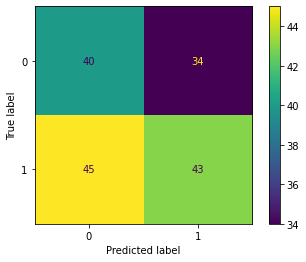

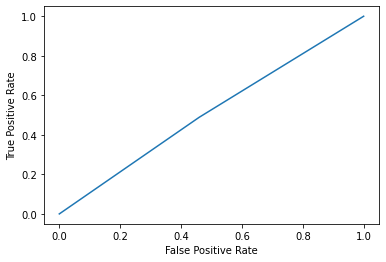

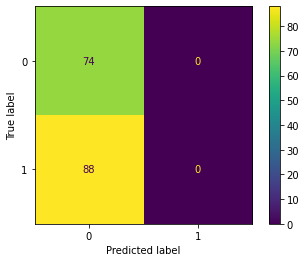

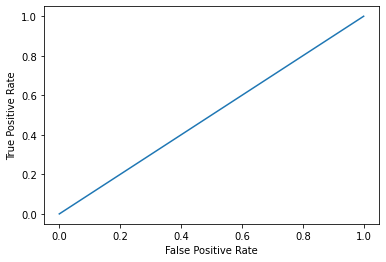

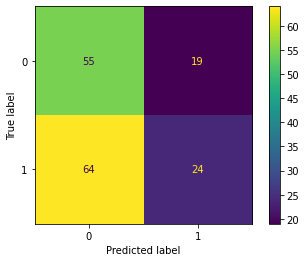

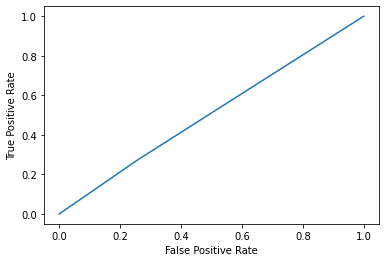

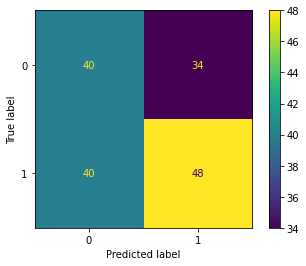

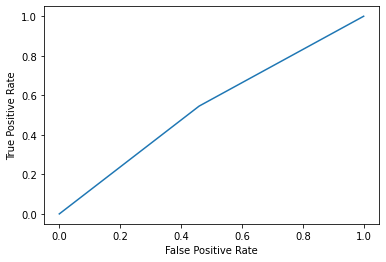

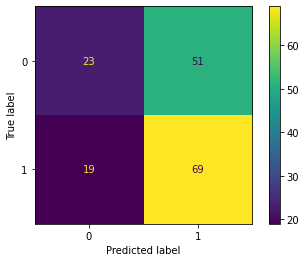

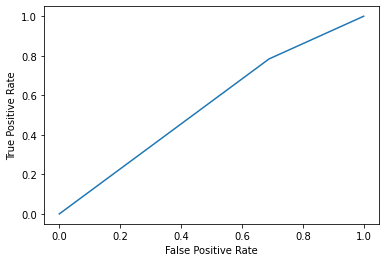

In [37]:
wandb.init(project='MDD-guido2020-classification-Reho')  

#Sample elements randomly 
test_loader  = torch.utils.data.DataLoader(test_dataset_cv , batch_size=batch_size, shuffle=True)

accuracy_fold=[]
F1_score_fold=[]
bal_acc_fold=[]

for k in np.arange(5): 

    print(f'Start TEST FOR FOLD {k}')

    path_fold = f'/data/zmohaghegh/TempStats_3D-CNN/best_valid_acc_reho_2020/model-best-reho-fold-{k}.pth'

    network.load_state_dict(torch.load(path_fold))

    test_loss_cv=0
    total = 0
    correct=0

    F1_labels=[]
    F1_pred=[]

    network.eval() # preoare model for test and evaluation

    with torch.no_grad():
        #print('Start testing CV...')
        for i, data in enumerate(test_loader, 0):
            #print(f'test {i}')

            inputs, lables = data

            outputs = network(inputs)

            lables=lables.double()
            outputss=outputs.squeeze(1) #[10,1] ---> [10]

            #do the prediction 
            predicted = outputss.data > 0.0

            #calculate loss
            loss = loss_function(outputss, lables)

            test_loss_cv += loss.item()
            correct += (predicted == lables).sum().item()
            total += lables.size(0)

            if i==0:
                F1_labels=lables.int().numpy()
                F1_pred=predicted.int().numpy()
            else:
                F1_labels= np.concatenate((F1_labels, lables.int().numpy()))
                F1_pred = np.concatenate((F1_pred, predicted.int().numpy()))
            
        wandb.log({ "test_Acc_CV": 100 * correct /total  , "test_Loss_CV": test_loss_cv/total })
        
        accuracy=100 * correct /total
        acc = accuracy_score(F1_labels, F1_pred)
        bal_acc= balanced_accuracy_score(F1_labels, F1_pred)

        F1_Score = f1_score(F1_labels, F1_pred, average='weighted')
        tn, fp, fn, tp = confusion_matrix(F1_labels, F1_pred).ravel()
        
        F1_score_fold.append(F1_Score)
        bal_acc_fold.append(bal_acc)
        accuracy_fold.append(accuracy)
        
        #PLotting Confusion matrix and ROC curve
        conf_matrix = confusion_matrix(F1_labels, F1_pred)
        conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()
        fp_rate, tp_rate, threshold = roc_curve(F1_labels, F1_pred)
        ROC_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate).plot()

        wandb.log({ "test_balanced_Acc_CV": bal_acc , "test_Acc_CV": 100 * correct /total, "test_F1_score_CV": F1_Score , "test_Loss_CV": test_loss_cv/total })
        
        print(f'test_Acc_CV": {accuracy}')
        print(f'F1_score CV ReHo :{F1_Score}')
        print(f'Balanced ACC CV ReHo :{bal_acc}')
        print(f'Loss CV ReHo : {test_loss_cv/total}')

In [38]:
import statistics

accuracy_avg=sum(accuracy_fold)/len(accuracy_fold)
accuracy_std=statistics.pstdev(accuracy_fold)


F1_score_avg= sum(F1_score_fold)/len(F1_score_fold)
F1_score_std= statistics.pstdev(F1_score_fold)

bal_acc_avg = sum(bal_acc_fold)/len(bal_acc_fold)
bal_acc_std = statistics.pstdev(bal_acc_fold)

#print(f' Average Accuracy ReHo ={accuracy_avg}')
#print(f'standard deviation :{accuracy_std}')

print(f' Average Balance ACC ReHo ={bal_acc_avg}')
print(f'standard deviation :{bal_acc_std}')

print(f' Average F1_score ReHo = { F1_score_avg}')
print(f'standard deviation :{F1_score_std}')

 Average Balance ACC ReHo =0.5226044226044226
standard deviation :0.019090104698158236
 Average F1_score ReHo = 0.4688786548171704
standard deviation :0.09616565041876046
